# Analysis of Hosted Game Data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv', sep='\t')

In [3]:
data.head()

HG Story Title           Author    Genre  \
0      Popcorn, Soda�Murder?           Pauzle  Mystery   
1         The Nightmare Maze  Alex Livingston   Horror   
2  What Happened Last Night?       Kie Brooks  Mystery   
3                   Paranoia       Kie Brooks   Puzzle   
4                 Imprisoned      Myth Thrazz  Fantasy   

  Subgenre (if applicable)  Word Count  # of Omnibus Ratings  Omnibus Rating  \
0                      NaN       23000                    65             4.1   
1                   Puzzle        5200                    29             4.0   
2                    Humor        4900                   134             3.9   
3                      NaN        5800                   180             3.9   
4                   Puzzle       40000                   358             4.2   

   # of Steam Reviews % of Positive Steam Reviews  # of Google Reviews  \
0                 NaN                         NaN               1229.0   
1                 NaN                         NaN               1069.0   
2                 NaN                         NaN                753.0   
3                 NaN                         NaN               1139.0   
4                 NaN                         NaN               2211.0   

  # of GPS Installs  GPS Score Release Date  Price Free?  
0             100k+        3.6     3/4/2010  $1.99   Yup  
1              50k+        3.5    6/17/2010  $0.99   Yup  
2              50k+        3.1    7/19/2010  $0.99   Yup  
3              50k+        3.4    4/16/2011  $0.99   Yup  
4             100k+        3.6    4/21/2011  $0.99   Yup

## 1. How many games have been released each year?

In [4]:
import datetime

In [5]:
# just converting dates to a standard format
release_dates = pd.to_datetime(data['Release Date'])

In [6]:
data['Release Date'] = release_dates

In [7]:
date_group = data.groupby([data['Release Date'].dt.year]).count()

In [8]:
date_group

HG Story Title  Author  Genre  Subgenre (if applicable)  \
Release Date                                                            
2010                       3       3      3                         2   
2011                      10      10     10                         8   
2012                       3       3      3                         2   
2013                       5       5      5                         3   
2014                      13      13     13                         7   
2015                      17      17     17                        11   
2016                      22      22     22                        15   
2017                      16      16     16                        12   
2018                      25      25     25                        15   
2019                      21      21     21                        10   
2020                      21      21     21                        17   
2021                       5       5      5                         4   

              Word Count  # of Omnibus Ratings  Omnibus Rating  \
Release Date                                                     
2010                   3                     3               3   
2011                  10                    10              10   
2012                   3                     3               3   
2013                   5                     5               5   
2014                  13                    13              13   
2015                  17                    17              17   
2016                  22                    22              22   
2017                  16                    16              16   
2018                  25                    25              25   
2019                  21                    21              21   
2020                  21                    21              21   
2021                   5                     5               5   

              # of Steam Reviews  % of Positive Steam Reviews  \
Release Date                                                    
2010                           0                            0   
2011                           1                            1   
2012                           0                            0   
2013                           1                            1   
2014                           3                            3   
2015                           5                            5   
2016                          10                           10   
2017                           7                            6   
2018                          15                           14   
2019                          10                           10   
2020                           9                            9   
2021                           2                            2   

              # of Google Reviews  # of GPS Installs  GPS Score  Release Date  \
Release Date                                                                    
2010                            3                  3          3             3   
2011                           10                 10         10            10   
2012                            3                  3          3             3   
2013                            5                  5          5             5   
2014                           11                 11         11            13   
2015                           17                 17         17            17   
2016                           22                 22         22            22   
2017                           16                 16         16            16   
2018                           25                 25         25            25   
2019                           21                 21         21            21   
2020                           20                 21         20            21   
2021                            5                  5          5             5   

              Price 

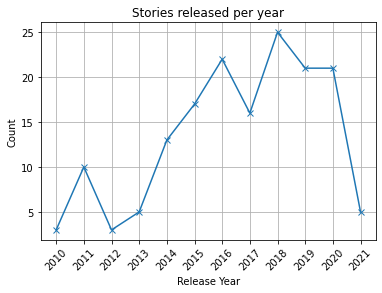

In [9]:
plt.plot(date_group['Release Date'].index, date_group['HG Story Title'], marker='x')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Stories released per year')
plt.grid(True)
plt.xticks(date_group['Release Date'].index, rotation=45)
plt.show()

Overall, the trend is increasing until a peak in 2018. Data for 2021 is incomplete.

## 2. How many games have been released in each genre?

In [10]:
genre_group = data[['Genre', 'HG Story Title']].groupby('Genre').count()

In [11]:
genre_group

HG Story Title
Genre                           
Adventure                      1
Crime                          6
Fantasy                       46
Historical                     7
Horror                         6
Humor                          3
Mystery                       11
Post-apocalyptic               6
Puzzle                         6
Romance                        5
School                         1
Sci-Fi                        16
Slice of Life                  6
Spy                            1
Steampunk                      4
Superhero                      9
Supernatural                  20
War                            7

In [12]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

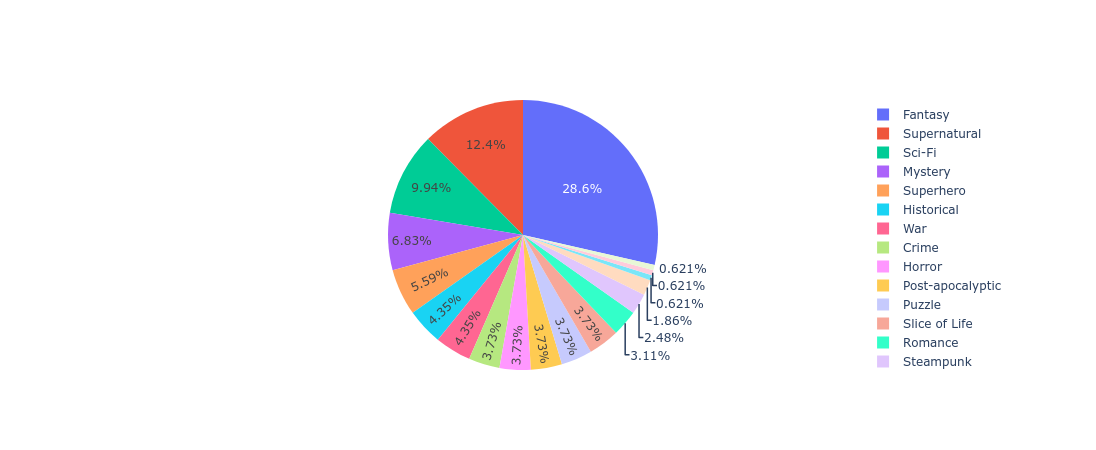

In [13]:
fig = go.Figure(data=[go.Pie(labels=genre_group.index, values=genre_group['HG Story Title'])])
iplot(fig)

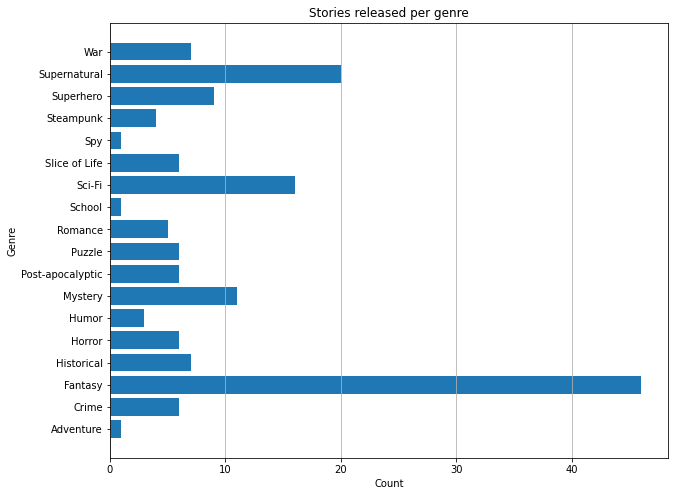

In [14]:
plt.figure(figsize=(10, 8))
plt.barh(genre_group.index, genre_group['HG Story Title'])
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Stories released per genre')
plt.grid(True, axis='x')
plt.show()

Fantasy is the most common genre, followed by Supernatural and Sci-Fi.

## 3. What are the most popular games?

### How do we measure popularity?

Maybe we can define "popularity" as omnibus reviews + Google reviews, since the Google downloads data is very coarse-grained.

As a sanity check, let's plot omnibus ratings vs google reviews, to see if they correlate.

In [15]:
data['Popularity'] = data['# of Omnibus Ratings'] + data['# of Google Reviews']

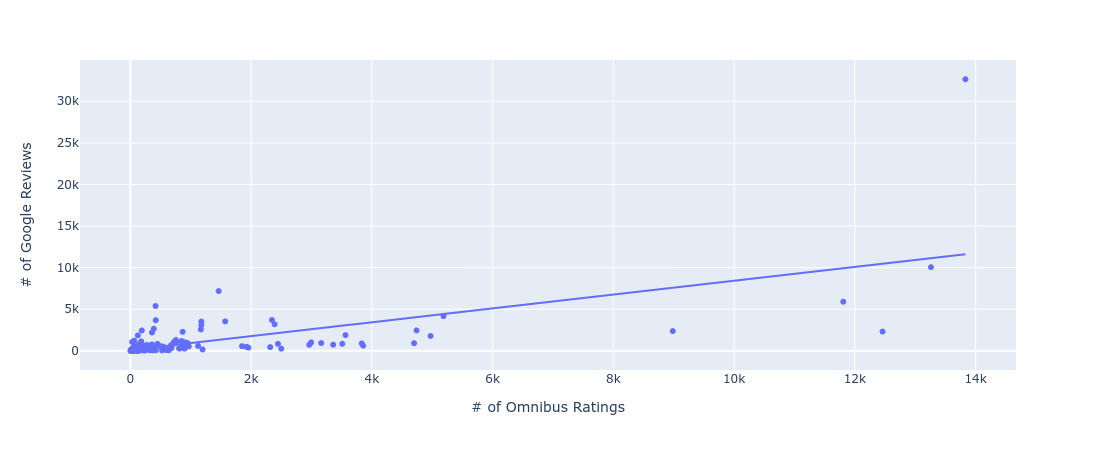

In [16]:
px.scatter(data, x='# of Omnibus Ratings', y='# of Google Reviews', hover_data=['HG Story Title'], trendline='ols')

This doesn't look so good but let's just calculate a correlation...

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

It turns out that some of the games don't have Google review data. Which are those games?

In [18]:
data[data['# of Google Reviews'].isna()]

HG Story Title           Author       Genre  \
27           Path of Light  Ivailo Daskalov     Fantasy   
33             Silent Gear         Lee Yuan      Sci-Fi   
143  Journey into Darkness   Jonathan Clark  Historical   

    Subgenre (if applicable)  Word Count  # of Omnibus Ratings  \
27                       NaN      100000                    14   
33                       War       40000                   169   
143                   Puzzle      110000                    10   

     Omnibus Rating  # of Steam Reviews % of Positive Steam Reviews  \
27              4.4                 NaN                         NaN   
33              4.2                 NaN                         NaN   
143             3.6                 NaN                         NaN   

     # of Google Reviews # of GPS Installs  GPS Score Release Date  Price  \
27                   NaN               NaN        NaN   2014-08-15  $0.99   
33                   NaN               NaN        NaN   2014-12-29  $1.99   
143                  NaN               1k+        NaN   2020-05-21  $3.99   

    Free?  Popularity  
27   Nope         NaN  
33    Yup         NaN  
143  Nope         NaN

Alright, let's just remove those games from the data.

In [19]:
data_clean = data[~data['# of Google Reviews'].isna()]

In [20]:
results = sm.OLS(data_clean['# of Omnibus Ratings'], sm.add_constant(data_clean['# of Google Reviews'])).fit()

In [21]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     # of Omnibus Ratings   R-squared:                       0.437
Model:                              OLS   Adj. R-squared:                  0.433
Method:                   Least Squares   F-statistic:                     121.1
Date:                  Tue, 08 Jun 2021   Prob (F-statistic):           3.31e-21
Time:                          00:54:06   Log-Likelihood:                -1400.9
No. Observations:                   158   AIC:                             2806.
Df Residuals:                       156   BIC:                             2812.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

That's a lot of numbers! Here I am attempting to discern the relationship between 

An important number here is **R-squared**. Basically, this shows the strength of the relationship between the two variables. It's 0.496, which is pretty decent. So there definitely is a relationship between the two popularity metrics. But I'm guessing the outlier kind of skews the results... What is the outlier, anyway? That seems to be by far the most popular game published by Hosted Games.

### Okay, but really, what are the most popular games?

In [22]:
data_popular = data.sort_values('Popularity', ascending=False)

In [23]:
data_popular.head(10)

HG Story Title                            Author  \
74             The Great Tournament                    Philip Kempton   
113             Life of a Mercenary                    Philip Kempton   
92    Wayhaven Chronicles: Book One                    Mishka Jenkins   
141  Wayhaven Chronicles: Book Two*                    Mishka Jenkins   
127        Hero or Villain: Genesis                             Adrao   
71        Zombie Exodus: Safe Haven                       Jim Dattilo   
8                     Zombie Exodus                       Jim Dattilo   
134            The War for the West                       Lucas Zaper   
133       Breach: The Archangel Job  Michael Maxwell and S. Ben Luigi   
42                 Samurai of Hyuga                     Devon Connell   

            Genre Subgenre (if applicable)  Word Count  # of Omnibus Ratings  \
74        Fantasy               Historical      190000                 13831   
113       Fantasy               Historical      340000                 13260   
92   Supernatural                  Romance      440000                 11807   
141  Supernatural                  Romance      790000                 12458   
127     Superhero                      NaN      330000                  8984   
71   Supernatural         Post-apocalyptic     1100000                  5187   
8    Supernatural         Post-apocalyptic      700000                  1463   
134       Fantasy                      NaN      490000                  4740   
133         Crime                      NaN      820000                  4972   
42        Fantasy               Historical      140000                  2344   

     Omnibus Rating  # of Steam Reviews % of Positive Steam Reviews  \
74              4.7                21.0                         90%   
113             4.6                 6.0                        100%   
92              4.8               238.0                         95%   
141             4.9               140.0                         99%   
127             4.6                25.0                         68%   
71              4.8               129.0                         89%   
8               4.7               138.0                         89%   
134             4.8                43.0                         81%   
133             4.9                53.0                         94%   
42              4.8                41.0                         82%   

     # of Google Reviews # of GPS Installs  GPS Score Release Date  Price  \
74               32649.0             500k+        4.7   2017-03-03  $4.99   
113              10060.0             100k+        4.4   2018-12-18  $3.99   
92                5909.0             100k+        4.7   2018-03-08  $4.99   
141               2319.0              10k+        4.9   2020-05-07  $6.99   
127               2380.0             100k+        4.2   2019-09-19  $3.99   
71                4176.0             100k+        4.4   2016-10-28  $4.99   
8                 7191.0             100k+        4.3   2011-12-04  $1.99   
134               2458.0              50k+        4.5   2019-11-14  $6.99   
133               1792.0              10k+        4.6   2019-11-14  $6.99   
42                3719.0             100k+        4.5   2015-07-17  $3.99   

    Free?  Popularity  
74    Yup     46480.0  
113   Yup     23320.0  
92   Nope     17716.0  
141  Nope     14777.0  
127  Nope     11364.0  
71   Nope      9363.0  
8    Nope      8654.0  
134  Nope      7198.0  
133  Nope      6764.0  
42   Nope      6063.0

The outlier that we saw earlier was *The Great Tournament*, which is the most popular Hosted Game.

By most metrics, Philip Kempton's The Great Tournament and Life of a Mercenary are the two most popular Hosted Games. Congrats I guess.

## 4. What factors relate to the popularity of a game?

### a) How does word count relate to popularity?

Let's do another linear regression!

In [24]:
results = sm.OLS(data_clean['Popularity'], sm.add_constant(data_clean['Word Count'])).fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     14.03
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000252
Time:                        00:54:06   Log-Likelihood:                -1553.6
No. Observations:                 158   AIC:                             3111.
Df Residuals:                     156   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        762.4819    497.399      1.533      0.1

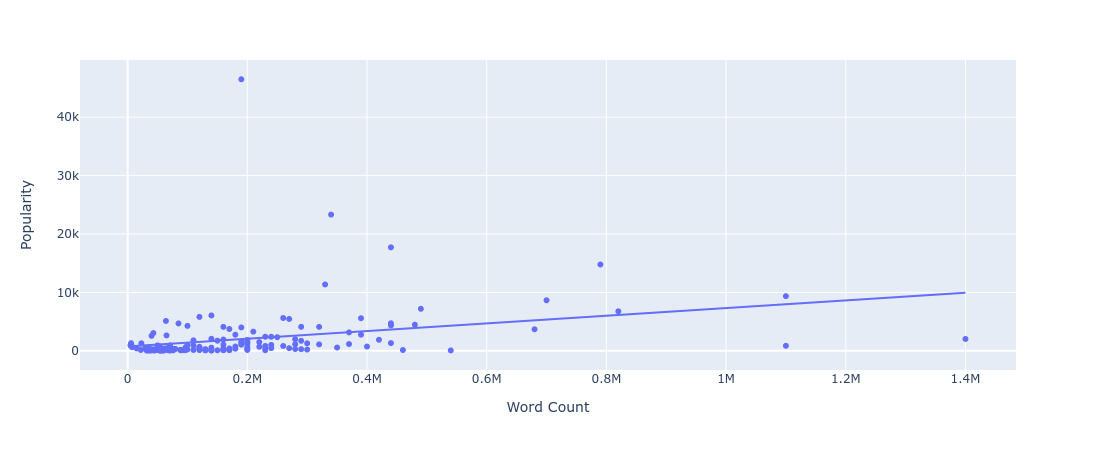

In [26]:
px.scatter(data_clean, x='Word Count', y='Popularity', hover_data=['HG Story Title'], trendline='ols')

There's definitely a positive relationship between word count and popularity, but the R^2 between word count and popularity is about 0.08, which is... very weak.

What happens if we remove The Great Tournament?

In [27]:
data_no_outliers = data_clean[data_clean['HG Story Title'] != 'The Great Tournament']

In [28]:
results = sm.OLS(data_no_outliers['Popularity'], sm.add_constant(data_no_outliers['Word Count'])).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     37.05
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           8.70e-09
Time:                        00:54:07   Log-Likelihood:                -1468.5
No. Observations:                 157   AIC:                             2941.
Df Residuals:                     155   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.8026    308.456      1.530      0.1

Now, the R^2 improves to 0.193, which is... better?

The regression equation is $Popularity = 0.066*WordCount + 471.8$

This means that, for example, the expected popularity of a 500k-word story would be about 3800.

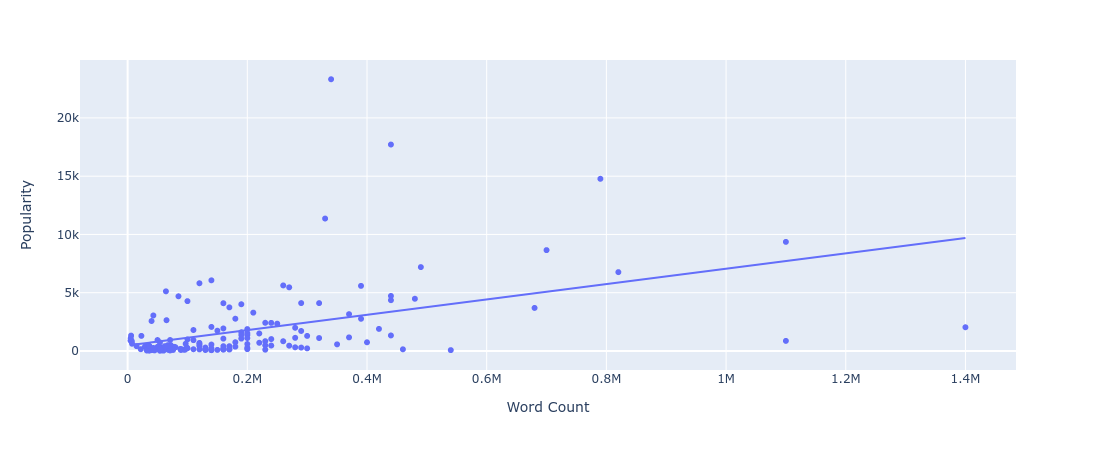

In [29]:
px.scatter(data_no_outliers, x='Word Count', y='Popularity', hover_data=['HG Story Title'], trendline='ols')

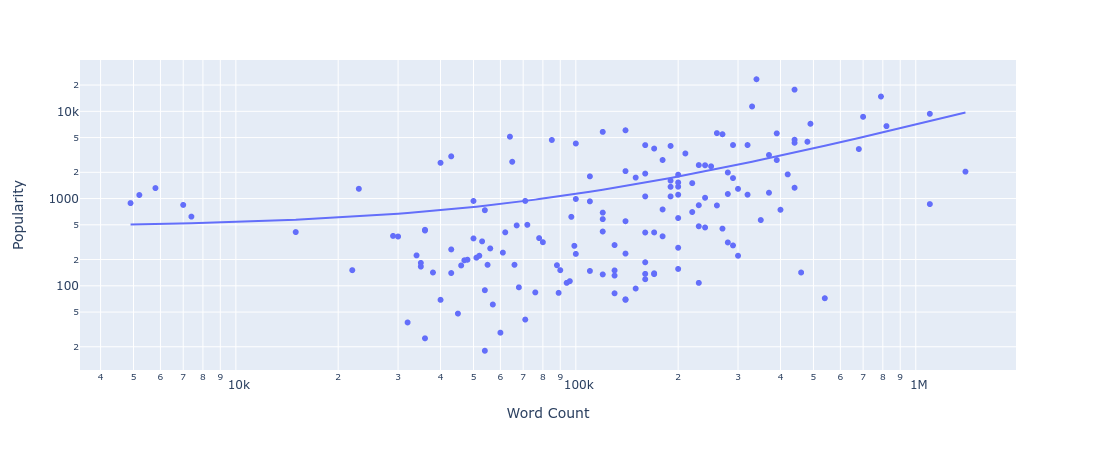

In [30]:
px.scatter(data_no_outliers, x='Word Count', y='Popularity', hover_data=['HG Story Title'], trendline='ols', log_x=True, log_y=True)

### How does release date relate to popularity?

We might expect earlier released games to be more popular, just because they've had more time to acquire readers. But we might also expect later released games to be more popular, because of greater visibility for HG in more recent years, and the more recent release of the omnibus app. Or maybe there is no relation at all. Which hypothesis is true?

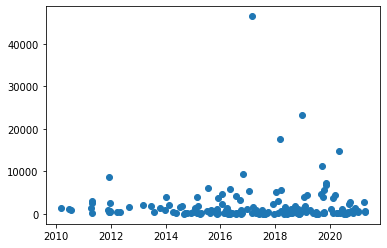

In [31]:
plt.scatter(data['Release Date'], data['Popularity'])

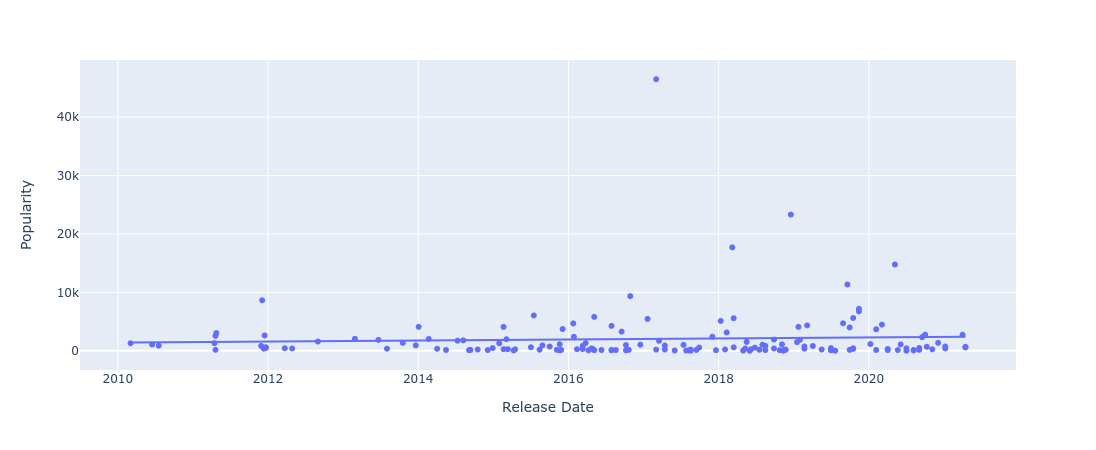

In [32]:
# okay that wasn't very helpful... but what is the outlier? (It's The Great Tournament)
px.scatter(data, x='Release Date', y='Popularity', hover_data=['HG Story Title'], trendline='ols')

It doesn't look like there's much of a relationship between popularity and release date.

### How does genre (and subgenre) relate to popularity?

Let's plot the average popularity per genre:

In [33]:
genre_pop_group = data_clean[['Genre', 'Popularity']].groupby('Genre').mean()

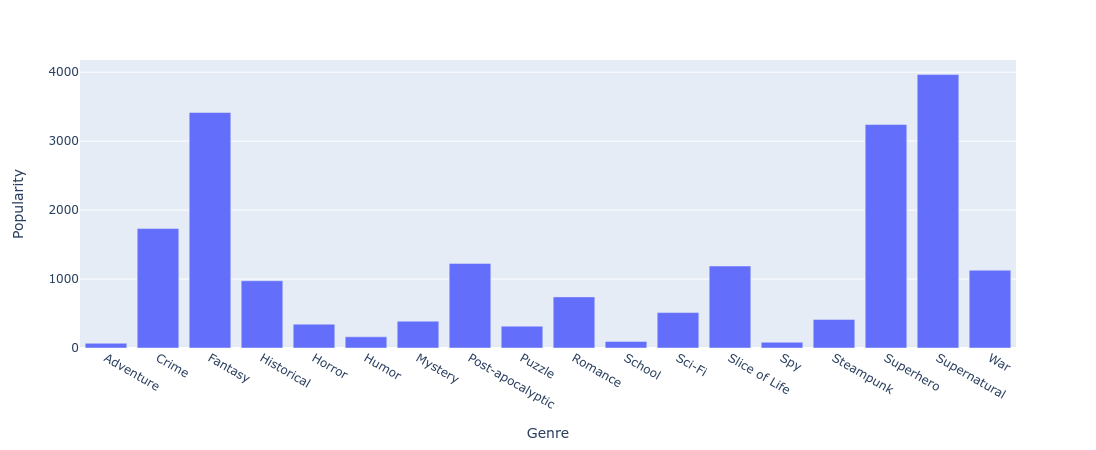

In [34]:
px.bar(genre_pop_group, x=genre_pop_group.index, y='Popularity')

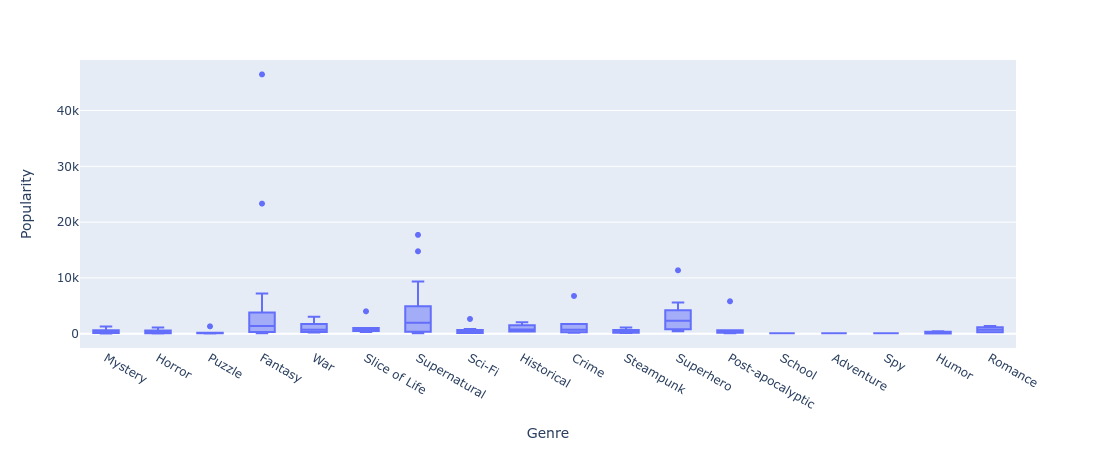

In [35]:
#Let's do a box plot with error bars...
px.box(data_clean, x='Genre', y='Popularity', hover_data=['HG Story Title'])

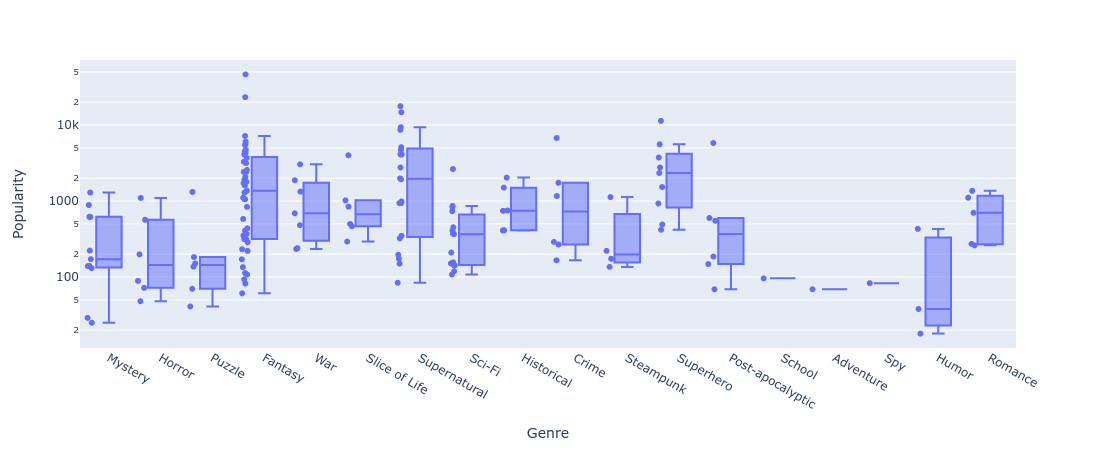

In [36]:
# log popularity by genre
games_plot = px.box(data_clean, x='Genre', y='Popularity', hover_data=['HG Story Title'], log_y=True, points='all')
games_plot.show()

In [37]:
games_plot.write_html('./log_popularity_by_genre.html')

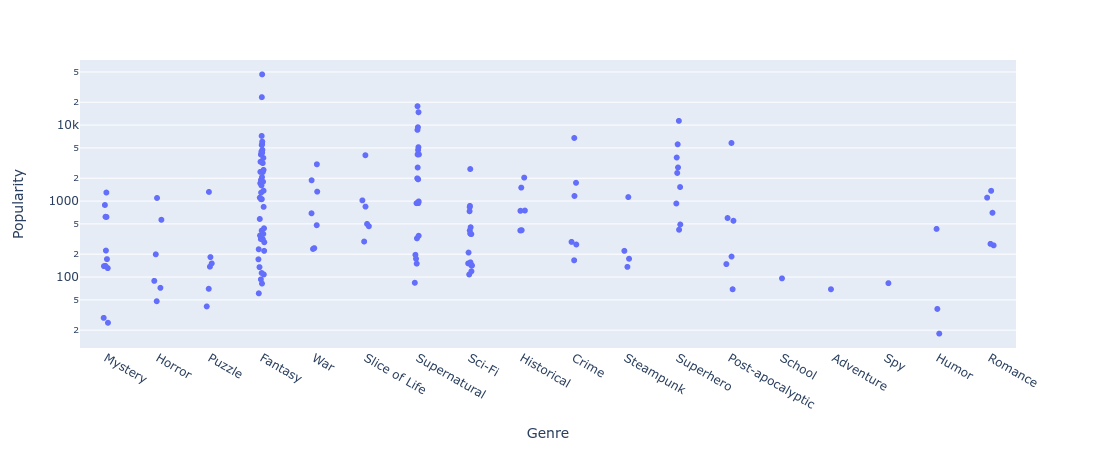

In [38]:
px.strip(data_clean, x='Genre', y='Popularity', hover_data=['HG Story Title'], log_y=True)

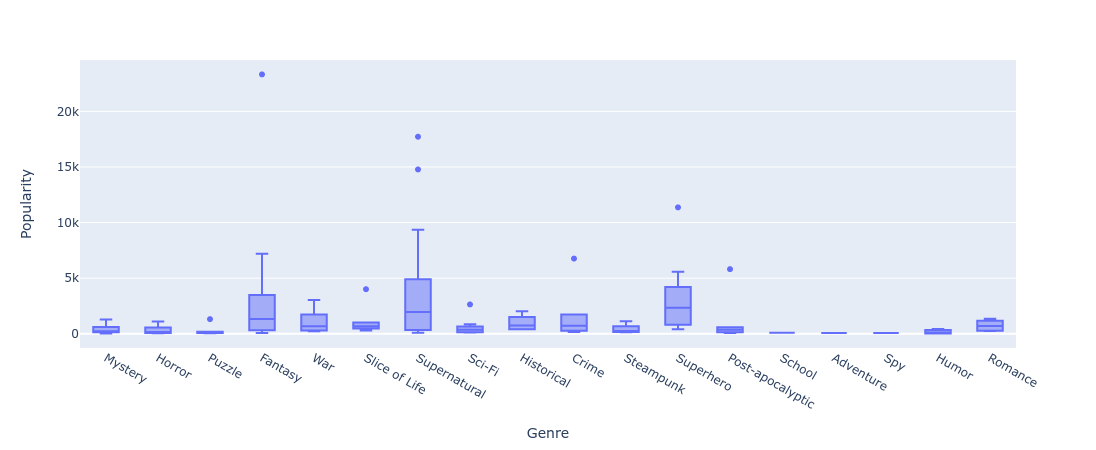

In [39]:
#Let's do a box plot with The Great Tournament removed...
px.box(data_no_outliers, x='Genre', y='Popularity', hover_data=['HG Story Title'])

Superatural, Fantasy, and Superhero are the most popular genres on average. They are also the most popular genres in total, so writers' interests and readers' interests seem to overlap for the most part. Interestingly, it seems that Superhero has the highest floor of popularity: the least popular Superhero game has a popularity of 419, which is the highest minimum popularity of any genre!

### Can we create a super-model that predicts popularity using Word Count, Genre, and Free?

We'll introduce dummy variables for all of the genres, as well as "Free?".

In [40]:
# 1. Create categorical variables to represent genre inclusions
genre_cols = []
genre_cols_quoted = []
for genre in set(data['Genre']):
    data['is_' + genre] = [int(x) for x in (data['Genre'] == genre)]
    genre_cols_quoted.append('"is_' + genre + '"')
    genre_cols.append('is_'+genre)

In [41]:
data['is_free'] = [int(x) for x in (data['Free?'] == 'Yup')]

In [42]:
data_clean = data[~data['# of Google Reviews'].isna()]
data_clean_X = data_clean[['Word Count', 'is_free'] + genre_cols]

data_no_outliers = data_clean[data_clean['HG Story Title'] != 'The Great Tournament']
data_noo_X = data_no_outliers[['Word Count', 'is_free'] + genre_cols]

In [43]:
results = sm.OLS(data_clean['Popularity'], sm.add_constant(data_clean_X)).fit()

In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.128
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00673
Time:                        00:54:08   Log-Likelihood:                -1540.1
No. Observations:                 158   AIC:                             3120.
Df Residuals:                     138   BIC:                             3182.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -983.5624    

Now, what the heck does this mean?

- The 'coef' field for each genre basically represents how much popularity (in terms of Google + omnibus ratings) you gain/lose by using that genre. Note that the error ranges (the last two columns) are very large, due to the small sample size.

If we interpret the linear regression coeffients very literally...

- Every additional word gets a game between 0.004 and 0.012 additional ratings.
- If a game is free, it'll gain between ~1400 and ~5200 ratings.
- If a game is in the fantasy genre, it'll gain between 580 and 3800 ratings (this is likely inflated by The Great Tournament and Life of a Mercenary, which I did not remove for this regression).
- If a game is in the supernatural genre, it'll gain between 60 and 4300 ratings (this is barely significant at p<0.05, and would not be "significant" if a FDR correction is applied).
- If a game is in the superhero genre, it'll gain between -341 and 5643 ratings (this is "almost significant" in p-hacker terminology). 

None of the other conclusions are significant. Based on this analysis, we cannot conclusively say that, for example, puzzle or adventure or horror games will have a penalty to popularity, simply because there are too few games in those categories. Similarly, we can't say that school or post-apocalyptic games will have a bonus to popularity.

Now, what if we remove The Great Tournament?

In [45]:
results = sm.OLS(data_no_outliers['Popularity'], sm.add_constant(data_noo_X)).fit()

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     3.901
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.42e-06
Time:                        00:54:09   Log-Likelihood:                -1451.4
No. Observations:                 157   AIC:                             2943.
Df Residuals:                     137   BIC:                             3004.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -511.8465    

These results actually look quite a bit better. Here's a summary:

- Every additional word gets a game between 0.005 and 0.009 additional ratings.
- If a game is free, it'll gain between 521 and 2868 ratings.
- If a game is in the fantasy genre, it'll gain between 213 and 2217 ratings.
- If a game is in the supernatural genre, it'll gain between 971 and 3594 ratings.
- If a game is in the Superhero genre, it'll gain between 513 and 4134 ratings.

These are all the "significant" conclusions here. According to the regression coefficients, puzzle, adventure, sci-fi, horror, historical, and steampunk all have penalties, while war, school, and post-apocalyptic all have slight bonuses. But none of those are "significant", because the sample size is very, very small.

### What are games that are more or less popular than predicted?

We can look at the residuals, which are the true value minus the predicted value. A positive residual indicates that a game was more popular than predicted, while a negative residual indicates that a game was less popular than predicted.

In [47]:
predictions = results.predict(sm.add_constant(data_noo_X))

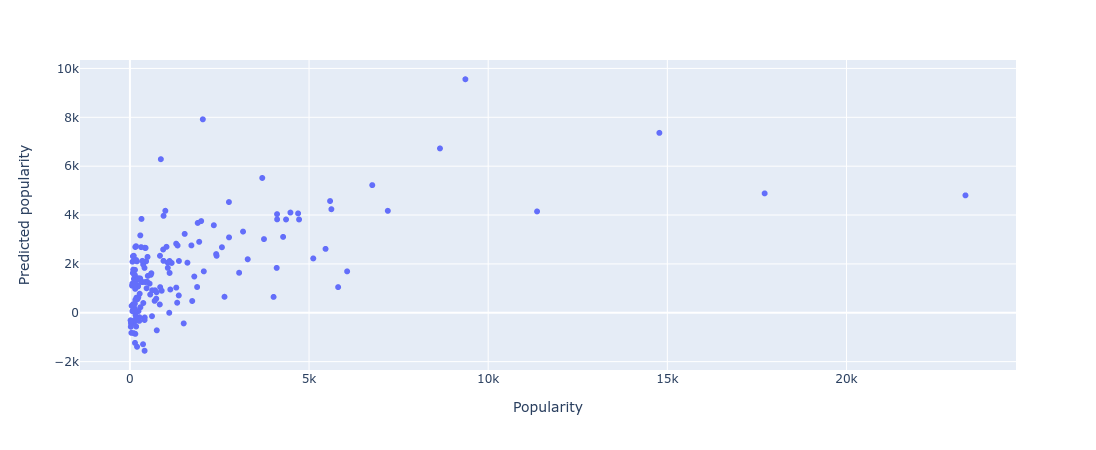

In [48]:
px.scatter(data_no_outliers, x='Popularity', y=predictions, hover_data=['HG Story Title'], labels={'y': 'Predicted popularity'})

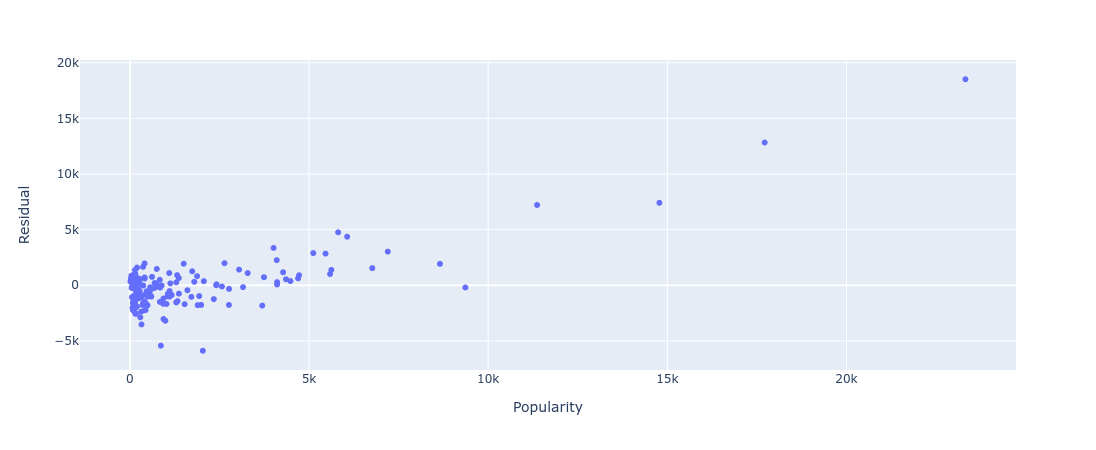

In [49]:
px.scatter(data_no_outliers, x='Popularity', y=results.resid, hover_data=['HG Story Title'], labels={'y': 'Residual'})

In [50]:
data_no_outliers['resid'] = results.resid
more_popular = data_no_outliers.sort_values('resid', ascending=False)
more_popular.head(10)

HG Story Title          Author             Genre  \
113             Life of a Mercenary  Philip Kempton           Fantasy   
92    Wayhaven Chronicles: Book One  Mishka Jenkins      Supernatural   
141  Wayhaven Chronicles: Book Two*  Mishka Jenkins      Supernatural   
127        Hero or Villain: Genesis           Adrao         Superhero   
60               Doomsday on Demand   Norbert Mohos  Post-apocalyptic   
42                 Samurai of Hyuga   Devon Connell           Fantasy   
128         The Parenting Simulator    Matt Simpson     Slice of Life   
134            The War for the West     Lucas Zaper           Fantasy   
89        The Aether: Life as a God     A. Reddwolf      Supernatural   
73                     Evertree Inn     Thom Baylay           Fantasy   

    Subgenre (if applicable)  Word Count  # of Omnibus Ratings  \
113               Historical      340000                 13260   
92                   Romance      440000                 11807   
141                  Romance      790000                 12458   
127                      NaN      330000                  8984   
60                       NaN      120000                   417   
42                Historical      140000                  2344   
128                    Humor      190000                  2995   
134                      NaN      490000                  4740   
89                   Fantasy       64000                  1571   
73                   Mystery      270000                  3563   

     Omnibus Rating  # of Steam Reviews % of Positive Steam Reviews  \
113             4.6                 6.0                        100%   
92              4.8               238.0                         95%   
141             4.9               140.0                         99%   
127             4.6                25.0                         68%   
60              4.6                 7.0                         43%   
42              4.8                41.0                         82%   
128             4.7                28.0                         93%   
134             4.8                43.0                         81%   
89              4.6                28.0                         82%   
73              4.8                28.0                         75%   

     # of Google Reviews  ... is_Sci-Fi  is_Crime is_Post-apocalyptic  \
113              10060.0  ...         0         0                   0   
92                5909.0  ...         0         0                   0   
141               2319.0  ...         0         0                   0   
127               2380.0  ...         0         0                   0   
60                5395.0  ...         0         0                   1   
42                3719.0  ...         0         0                   0   
128               1015.0  ...         0         0                   0   
134               2458.0  ...         0         0                   0   
89                3547.0  ...         0         0                   0   
73                1898.0  ...         0         0                   0   

    is_Supernatural is_Slice of Life  is_Historical  is_Spy  is_Superhero  \
113               0                0              0       0             0   
92                1                0              0       0             0   
141               1                0              0       0             0   
127               0                0              0       0             1   
60                0                0              0       0             0   
42                0                0              0       0             0   
128               0                1              0       0             0   
134               0                0              0       0             0   
89                1                0              0       0             0   
73                0                0              0       0             0   

     is_free         resid  
113        1  18514.753809 

The games that are more popular than expected are, in order (not including The Great Tournament): Life of a Mercenary, Wayhaven 1, Wayhaven 2, Hero or Villain, Doomsday on Demand, Samurai of Hyuga, The Parenting Similator, War for the West, The Aether, and Evertree Inn.

In [51]:
less_popular = data_no_outliers.sort_values('resid', ascending=True)
less_popular.head(10)

HG Story Title           Author         Genre  \
22                        Tin Star       Allen Gies    Historical   
54                       Magikiras      Gabriel Cha        Sci-Fi   
59          Gambling With Eternity    Ashlee Sierra  Supernatural   
68   Elemental Saga: The Awakening  Mandar Deshmukh  Supernatural   
20                         Burn(t)        Vivi Tran  Supernatural   
36                   Seven Bullets   Cloud Buchholz         Crime   
70                     Twin Flames  Ivailo Daskalov       Fantasy   
85               Lost in the Pages          Various  Supernatural   
139                The Aegis Saga*   Charles Parkes       Fantasy   
58                      Best of Us      Teo Kuusela     Superhero   

    Subgenre (if applicable)  Word Count  # of Omnibus Ratings  \
22                       NaN     1400000                   847   
54                      Mech     1100000                   204   
59                    Horror       53000                   158   
68                    School      100000                   273   
20          Post-apocalyptic       71000                   378   
36                       NaN      290000                   205   
70                       NaN       46000                    60   
85                    Puzzle      130000                    35   
139             Supernatural      280000                   225   
58                       NaN      120000                   186   

     Omnibus Rating  # of Steam Reviews % of Positive Steam Reviews  \
22              4.9               263.0                         96%   
54              4.2                 9.0                         44%   
59              4.0                 NaN                         NaN   
68              4.2                 NaN                         NaN   
20              3.4                 NaN                         NaN   
36              4.4                 NaN                         NaN   
70              4.3                 NaN                         NaN   
85              4.7                 NaN                         NaN   
139             4.6                 9.0                         56%   
58              4.1                13.0                         23%   

     # of Google Reviews  ... is_Sci-Fi  is_Crime is_Post-apocalyptic  \
22                1188.0  ...         0         0                   0   
54                 660.0  ...         1         0                   0   
59                 165.0  ...         0         0                   0   
68                 716.0  ...         0         0                   0   
20                 561.0  ...         0         0                   0   
36                  85.0  ...         0         1                   0   
70                 111.0  ...         0         0                   0   
85                 115.0  ...         0         0                   0   
139                 89.0  ...         0         0                   0   
58                 233.0  ...         0         0                   0   

    is_Supernatural is_Slice of Life  is_Historical  is_Spy  is_Superhero  \
22                0                0              1       0             0   
54                0                0              0       0             0   
59                1                0              0       0             0   
68                1                0              0       0             0   
20                1                0              0       0             0   
36                0                0              0       0             0   
70                0                0              0       0             0   
85                1                0              0       0             0   
139               0                0              0       0             0   
58                0                0              0       0             1   

     is_free        resid  
22         0 -5882.313418  
54         0 -5422.159138  
59         1 -3

The games that are less popular than expected are, in order: Tin Star, Magikiras, Gambling with Eternity, Elemental Saga, Burn(t), Seven Bullets, Twin Flames, Lost in the Pages, The Aegis Saga, and Best of Us.

### Do the results improve if we use sub-genres?

What if we added data for secondary genres as well as primary genres?

In [52]:
# 1. Create categorical variables to represent genre inclusions
data_subgenres = data.copy()
genre_cols = []
genre_cols_quoted = []
for genre in set(data['Genre']):
    data_subgenres['is_' + genre] = [int(x) for x in ((data['Genre'] == genre) | (data['Subgenre (if applicable)'] == genre))]
    genre_cols_quoted.append('"is_' + genre + '"')
    genre_cols.append('is_'+genre)

In [53]:
data_sg_clean = data_subgenres[~data_subgenres['# of Google Reviews'].isna()]
data_sg_clean_X = data_sg_clean[['Word Count', 'is_free'] + genre_cols]

data_sg_no_outliers = data_sg_clean[data_clean['HG Story Title'] != 'The Great Tournament']
data_sg_noo_X = data_sg_no_outliers[['Word Count', 'is_free'] + genre_cols]

In [54]:
results = sm.OLS(data_sg_no_outliers['Popularity'], sm.add_constant(data_noo_X)).fit()

In [55]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     3.901
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.42e-06
Time:                        00:54:09   Log-Likelihood:                -1451.4
No. Observations:                 157   AIC:                             2943.
Df Residuals:                     137   BIC:                             3004.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -511.8465    

Well, the $R^2$ is a bit higher here, at 0.363 vs 0.351 for the primary genre-only model. So that's good, indicating that the sub-genre provides some additional information. The coefficients for Word Count and is_free are pretty similar as before.

The interesting thing is that it totally changes the directions of some of the coefficients for the genres:

- Romance is now the best genres, giving 1080 to 5558 additional reviews (it was negative when only considering primary genre; I'm blaming Wayhaven).
- The bonus from Fantasy is no longer significant no longer significant (the range is -408 to 2485).
- Superhero and Supernatural still give significant bonuses.

In order of highest to lowest predicted popularity gain, the genres are:

1. Romance*
2. Superhero*
3. Supernatural*
4. Post-apocalyptic
5. Fantasy
6. Historical
7. Slice-of-life
8. Spy
9. Steampunk
10. Mystery
11. Humor

and these genres are predicted to cause popularity loss:

12. War
13. School
14. Sci-Fi
15. Puzzle
16. Horror
17. Adventure

(* means that the effect of that genre is statistically significant at p<0.05.)

### Use log-word count instead of word count?

What if we tried to do a regression on log(Word Count) instead?

In [56]:
import numpy as np
data_no_outliers['log_WC'] = np.log2(data_no_outliers['Word Count'])

In [57]:
data_noo_X = data_no_outliers[['log_WC', 'is_free'] + genre_cols]

In [58]:
results_loglog = sm.OLS(np.log2(data_no_outliers['Popularity']), sm.add_constant(data_noo_X)).fit()

In [59]:
print(results_loglog.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     6.117
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           4.88e-11
Time:                        00:54:10   Log-Likelihood:                -295.41
No. Observations:                 157   AIC:                             630.8
Df Residuals:                     137   BIC:                             691.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3852    

In [60]:
predictions = results_loglog.predict(sm.add_constant(data_noo_X))

In [61]:
predictions = 2**predictions

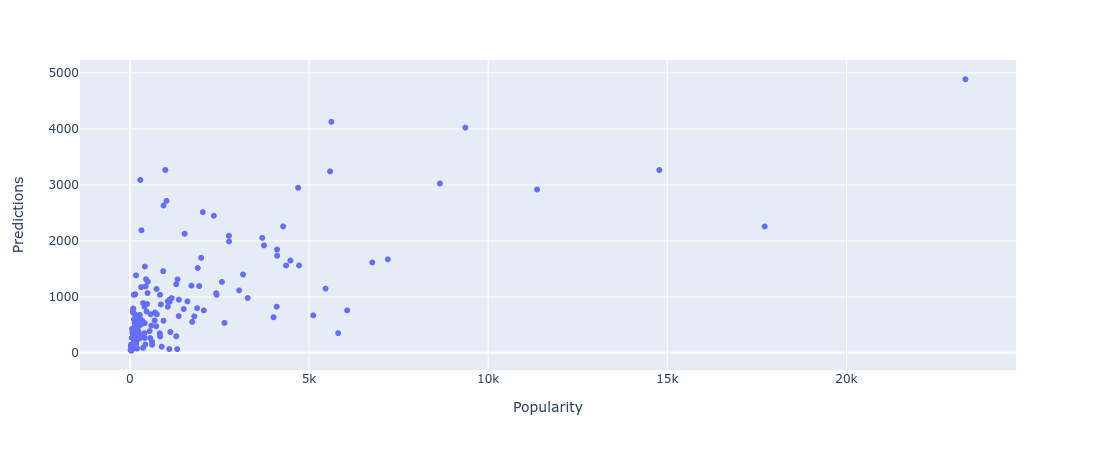

In [62]:
px.scatter(data_no_outliers, x='Popularity', y=predictions, hover_data=['HG Story Title'], labels={'y': 'Predictions'})

Is the log regression better than the linear regression? Hard to say. The errors are just as large, but at least there aren't any negative predictions.

## 5. What is the relationship between the ratings on different platforms?

Let's just try plotting the Google ratings vs the omnibus ratings.

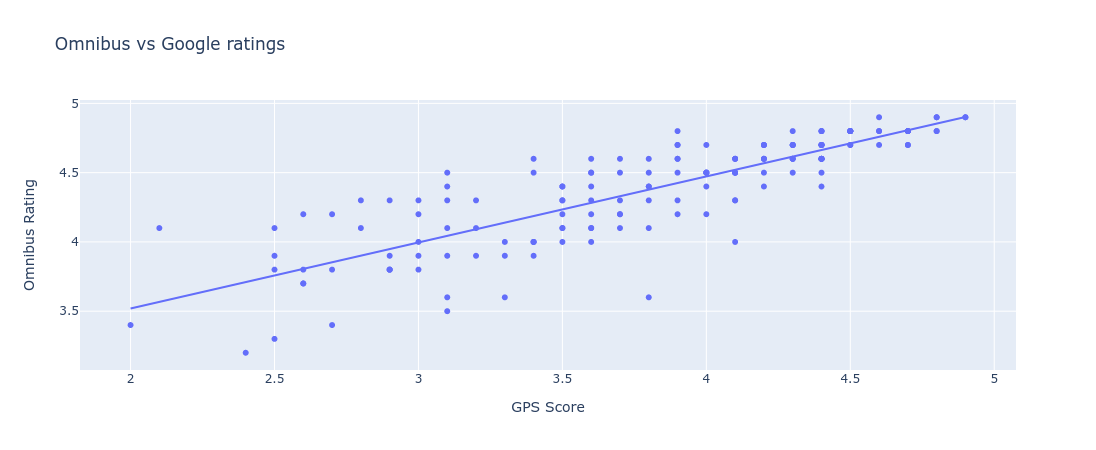

In [63]:
px.scatter(data_clean, x='GPS Score', y='Omnibus Rating', trendline='ols', hover_data=['HG Story Title'],
           title = 'Omnibus vs Google ratings')

Overall, the Omnibus rating and GPS rating correlate very well, with an $R^2$ of 0.7 in the above line.

The regression equation is $OmnibusRating = 0.477*GPS + 2.565$.

### How do GPS and Omnibus ratings correlate with popularity?

Let's plot GPS Score vs GPS ratings count, and Omnibus Rating vs Omnibus rating count.

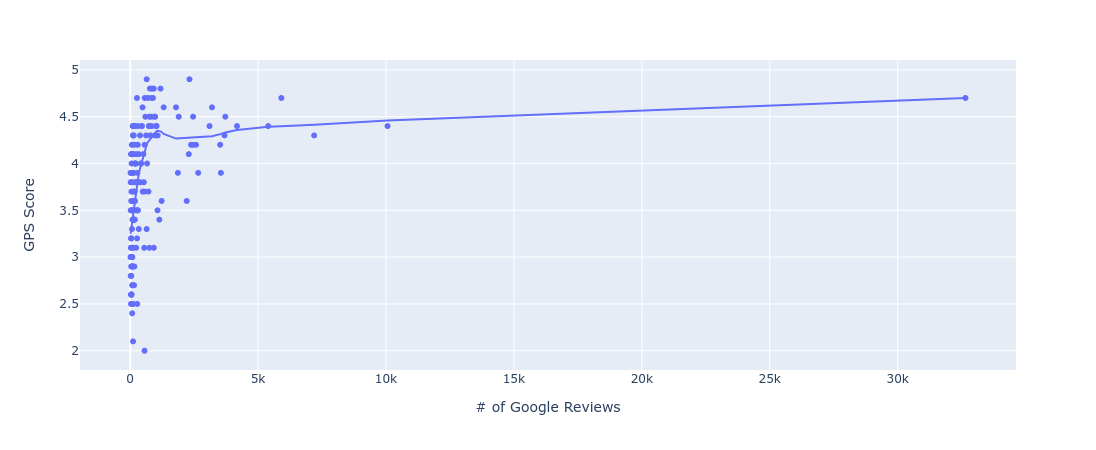

In [64]:
px.scatter(data_clean, x='# of Google Reviews', y='GPS Score', trendline='lowess', hover_data=['HG Story Title'])

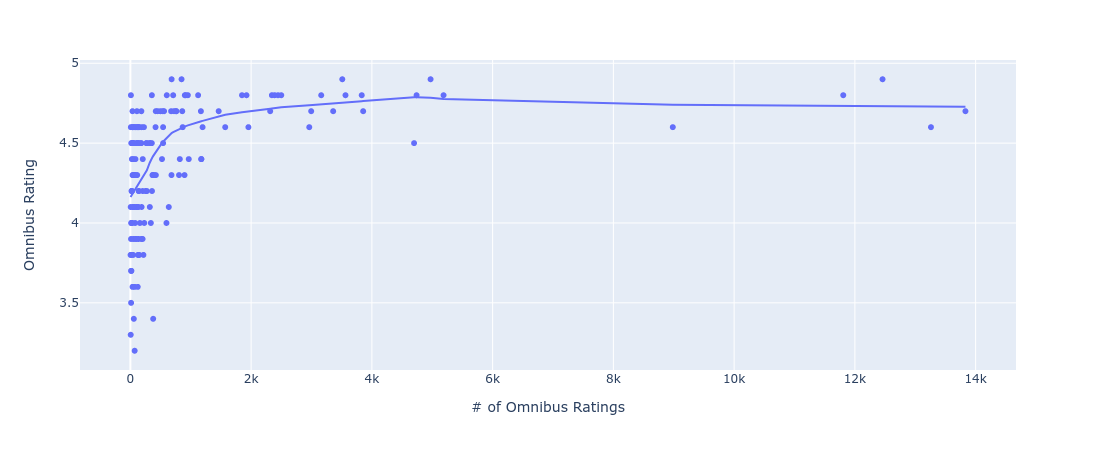

In [65]:
px.scatter(data_clean, x='# of Omnibus Ratings', y='Omnibus Rating', trendline='lowess', hover_data=['HG Story Title'])

From this, it's pretty clear that more popular games tend to have higher ratings on both platforms. Not going to try to do any regressions here.

## 6. What is the relationship between genre, word count, and rating?

Okay, we're going to do some more regressions. There's probably a better way to do this than OLS because ratings are in a pretty narrow range.

Let's consider the data without sub-genres first:

In [66]:
data_noo_X = data_no_outliers[['Word Count', 'is_free'] + genre_cols]
results = sm.OLS(data_no_outliers['Omnibus Rating'], sm.add_constant(data_noo_X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Omnibus Rating   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     5.522
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           7.03e-10
Time:                        00:54:10   Log-Likelihood:                -25.505
No. Observations:                 157   AIC:                             91.01
Df Residuals:                     137   BIC:                             152.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.0306    

Interpretation:

- The R^2 is 0.434, which is not bad.
- The "baseline" rating is about a 4.
- Higher word counts give higher ratings.
- Free games have a lowered rating by about 0.24 stars.

Genres sorted by rating bonuses:

Adventure
Spy
Fantasy*
Superhero*
War*
Supernatural*
Slice of Life*
Post-Apocalyptic*
Crime*
Horror*
Sci-Fi*
Historical
Romance
Mystery
Steampunk

And here are the predicted "negative" genres:
Puzzle
School
Humor

Again, a * indicates statistical significance at p<0.05.

Interestingly, Adventure and Spy were some of the worst performing genres in terms of popularity. It's interesting that they seem to give ratings bonuses in the omnibus (but these are very small sample sizes).

Now, let's use the secondary genres:

In [67]:
data_sg_noo_X = data_sg_no_outliers[['Word Count', 'is_free'] + genre_cols]
results = sm.OLS(data_sg_no_outliers['Omnibus Rating'], sm.add_constant(data_sg_noo_X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Omnibus Rating   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     4.102
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.54e-07
Time:                        00:54:10   Log-Likelihood:                -33.084
No. Observations:                 157   AIC:                             108.2
Df Residuals:                     136   BIC:                             172.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2571    

The R^2 here is slightly worse than only using the primary genre.

The trends with regard to genre are... a lot more unclear vs only using the primary genre. None of the results are significant at p<0.05.

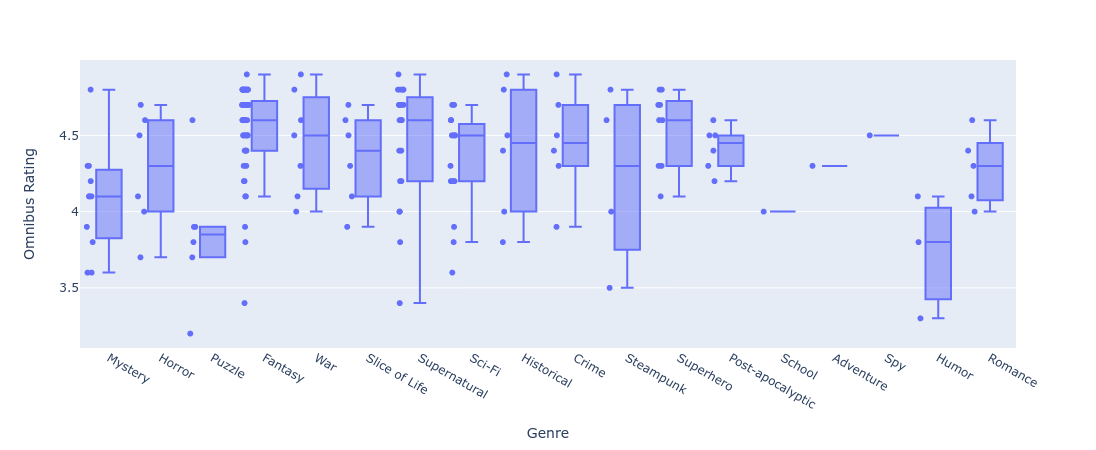

In [68]:
genre_ratings_plot = px.box(data_clean, x='Genre', y='Omnibus Rating', hover_data=['HG Story Title'], points='all')
genre_ratings_plot.show()

In [69]:
genre_ratings_plot.write_html('genre_ratings_plot.html')

## What are the most underrated games?

How are we defining "underrated" here? Let's just say, the games whose ratings are higher than expected given their popularity. I think we should do log-popularity because it looks kinda more linear.

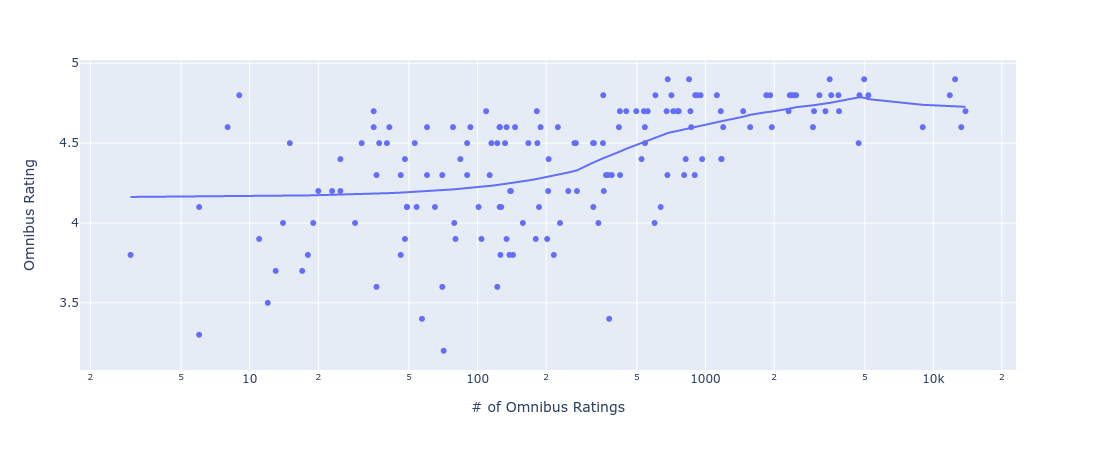

In [70]:
px.scatter(data_clean, x='# of Omnibus Ratings', y='Omnibus Rating', trendline='lowess', hover_data=['HG Story Title'], log_x=True)

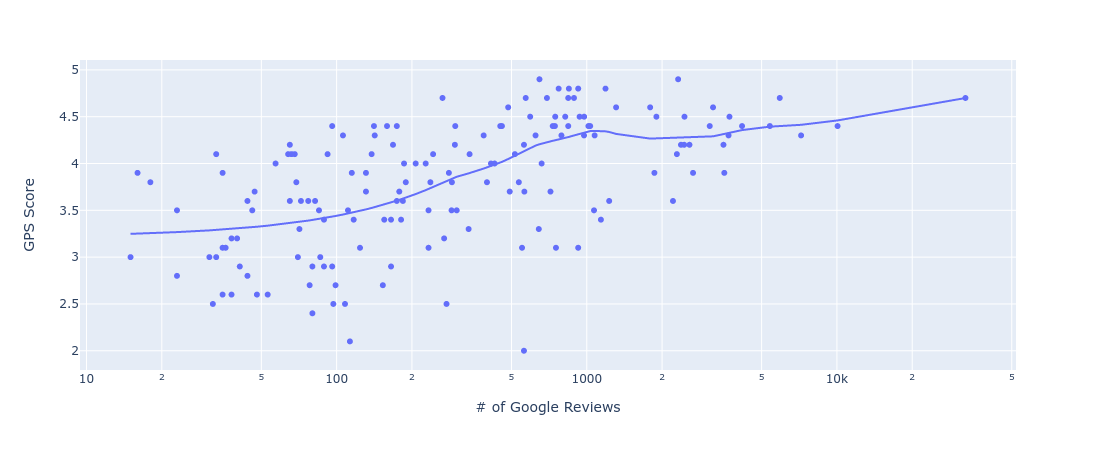

In [74]:
px.scatter(data_clean, x='# of Google Reviews', y='GPS Score', trendline='lowess', hover_data=['HG Story Title'], log_x=True)

Let's do a linear regression of the omnibus and GPS ratings as a function of log(review count).

In [76]:
omnibus_results = sm.OLS(data_no_outliers['Omnibus Rating'], sm.add_constant(np.log2(data_no_outliers['# of Omnibus Ratings']))).fit()
print(omnibus_results.summary())

                            OLS Regression Results                            
Dep. Variable:         Omnibus Rating   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     81.00
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           7.63e-16
Time:                        00:59:37   Log-Likelihood:                -37.137
No. Observations:                 157   AIC:                             78.27
Df Residuals:                     155   BIC:                             84.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6801 

In [77]:
gps_results = sm.OLS(data_no_outliers['GPS Score'], sm.add_constant(np.log2(data_no_outliers['# of Google Reviews']))).fit()
print(gps_results.summary())

                            OLS Regression Results                            
Dep. Variable:              GPS Score   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     75.55
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           4.77e-15
Time:                        01:00:11   Log-Likelihood:                -127.24
No. Observations:                 157   AIC:                             258.5
Df Residuals:                     155   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3347    

In [83]:
omnibus_predictions = omnibus_results.predict(sm.add_constant(np.log2(data_no_outliers['# of Omnibus Ratings'])))
data_no_outliers['omnibus_rating_predictions'] = omnibus_predictions
data_no_outliers['omnibus_resid'] = omnibus_results.resid

In [84]:
gps_predictions = gps_results.predict(sm.add_constant(np.log2(data_no_outliers['# of Google Reviews'])))
data_no_outliers['gps_rating_predictions'] = gps_predictions
data_no_outliers['gps_resid'] = gps_results.resid

In [86]:
data_no_outliers.sort_values('omnibus_resid', ascending=False).head(10)

HG Story Title                          Author         Genre  \
145          Trees Don’t Tell                     Taylor Zane       Mystery   
83         The Dryad’s Riddle                     Avery Moore        Puzzle   
85          Lost in the Pages                         Various  Supernatural   
82               Diamant Rose                     Teo Kuusela           Spy   
48         Captive of Fortune           Samuel Harrison Young       Fantasy   
88   Foundation of Nightmares           Samuel Harrison Young       Fantasy   
86     Highlands, Deep Waters  Fernando Neves and Lucas Zaper        Horror   
30            Divided We Fall                   Alex Clifford           War   
56           Guns of Infinity                       Paul Wang           War   
61        Starship Adventures                         Various        Sci-Fi   

    Subgenre (if applicable)  Word Count  # of Omnibus Ratings  \
145                   Horror       36000                     9   
83                   Fantasy       71000                     8   
85                    Puzzle      130000                    35   
82                   Mystery       89000                    15   
48                       NaN      130000                    35   
88                       NaN       96000                    41   
86                   Mystery      350000                   109   
30                Historical      140000                    60   
56                   Fantasy      440000                   683   
61                     Humor       94000                    31   

     Omnibus Rating  # of Steam Reviews % of Positive Steam Reviews  \
145             4.8                 NaN                         NaN   
83              4.6                 NaN                         NaN   
85              4.7                 NaN                         NaN   
82              4.5                 NaN                         NaN   
48              4.6                 3.0                          0%   
88              4.6                 0.0                         NaN   
86              4.7                20.0                         80%   
30              4.6                 NaN                         NaN   
56              4.9                76.0                         94%   
61              4.5                 NaN                         NaN   

     # of Google Reviews  ... is_Historical  is_Spy is_Superhero is_free  \
145                 16.0  ...             0       0            0       0   
83                  33.0  ...             0       0            0       0   
85                 115.0  ...             0       0            0       0   
82                  68.0  ...             0       1            0       0   
48                  47.0  ...             0       0            0       0   
88                  72.0  ...             0       0            0       0   
86                 458.0  ...             0       0            0       0   
30                 174.0  ...             0       0            0       0   
56                 647.0  ...             0       0            0       0   
61                  77.0  ...             0       0            0       0   

            resid     log_WC  omnibus_rating_predictions  \
145  5.976862e+02  15.135709                    3.957997   
83   8.630991e+02  16.115531                    3.943100   
85  -2.541115e+03  16.988152                    4.129766   
82   1.192461e-09  16.441518                    4.022604   
48  -1.542070e+03  16.988152                    4.129766   
88  -1.270385e+03  16.550747                    4.149778   
86  -1.792234e+02  18.416995                    4.273443   
30  -3.954785e+02  17.095067                    4.197936   
56  -1.423167e+03  18.747144                    4.505544   
61   9.432751e+02  16.520373                    4.114417   

     gps_rating_predictions  omnibus_resid  gps_resid  
145                3.052101       0.842003   0.847899  
83                 3.23942

### Most underrated games based on Omnibus

1. Trees Don't Tell
2. The Dryad's Riddle
3. Lost in the Pages
4. Diamant Rose
5. Captive of Fortune
6. Foundation of Nightmares
7. Highlands, Deep Waters
8. Divided We Fall
9. Guns of Infinity
10. Starship Adventures

In [87]:
data_no_outliers.sort_values('gps_resid', ascending=False).head(10)

HG Story Title             Author  \
158               Keeper of the Day and Night    Brynn Chernosky   
56                           Guns of Infinity          Paul Wang   
111                         The Butler Did It   Daniel J. Elliot   
83                         The Dryad’s Riddle        Avery Moore   
145                          Trees Don’t Tell        Taylor Zane   
121                   The Saga of Oedipus Rex         Jac Colvin   
157                    Relics of the Lost Age         James Shaw   
101                      The Harbinger’s Head        Kim Berkley   
38                  The Volunteer Firefighter  Stefanie Handshaw   
47   A Study in Steampunk: Choice by Gaslight     Heather Albano   

             Genre Subgenre (if applicable)  Word Count  # of Omnibus Ratings  \
158   Supernatural                   School      390000                  2499   
56             War                  Fantasy      440000                   683   
111      Steampunk                   Puzzle      300000                   125   
83          Puzzle                  Fantasy       71000                     8   
145        Mystery                   Horror       36000                     9   
121        Fantasy               Historical      100000                   167   
157     Historical                  Fantasy      400000                   603   
101         Horror             Supernatural       48000                    93   
38   Slice of Life                   Modern      130000                   134   
47       Steampunk                  Mystery      280000                   356   

     Omnibus Rating  # of Steam Reviews % of Positive Steam Reviews  \
158             4.8                16.0                        100%   
56              4.9                76.0                         94%   
111             4.6                 NaN                         NaN   
83              4.6                 NaN                         NaN   
145             4.8                 NaN                         NaN   
121             4.5                 NaN                         NaN   
157             4.8                 9.0                         78%   
101             4.6                12.0                        100%   
38              4.6                 NaN                         NaN   
47              4.8               151.0                         96%   

     # of Google Reviews  ... is_Historical  is_Spy is_Superhero is_free  \
158                265.0  ...             0       0            0       0   
56                 647.0  ...             0       0            0       0   
111                 96.0  ...             0       0            0       0   
83                  33.0  ...             0       0            0       0   
145                 16.0  ...             0       0            0       0   
121                 65.0  ...             0       0            0       0   
157                141.0  ...             1       0            0       0   
101                106.0  ...             0       0            0       0   
38                 159.0  ...             0       0            0       0   
47                 772.0  ...             0       0            0       0   

           resid     log_WC  omnibus_rating_predictions  \
158 -1767.644568  18.573115                    4.669602   
56  -1423.166624  18.747144                    4.505544   
111  -873.330210  18.194603                    4.290765   
83    863.099149  16.115531                    3.943100   
145   597.686247  15.135709                    3.957997   
121 -1179.700916  16.609640                    4.327403   
157   -94.352899  18.609640                    4.489788   
101  1590.622713  15.550747                    4.253365   
38     67.933557  16.988152                    4.299559   
47    175.249001  18.095067                    4.423137   

     gps_rating_predictions  omnibus_resid  gps_resid  
158                3.778476       0.130398   0.921524  
56       

### Most underrated games based on Google Play

1. Keeper of the Day and Night (probably due to recency)
2. Guns of Infinity
3. The Butler Did It
4. The Dryad's Riddle
5. Trees Don't Tell
6. The Saga of Oedipus Rex
7. Relics of the Lost Age (recency is probably an effect)
8. The Harbinger's Head
9. The Volunteer Firefighter
10. A Study in Steampunk